### Data Preparation

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [21]:
# Checking the number of mice.
mouse_count = len(pd.unique(merge_df['Mouse ID']))
print(f"Number of mice: {mouse_count}")

Number of mice: 249


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = merge_df[merge_df["Mouse ID"].duplicated() == True]
dupes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12.827251,25.593674,22.536496,51.273592,1.176399
std,7.185777,3.951053,12.705351,9.269633,1.144157
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,10.000000,46.035588,0.000000
50%,13.000000,26.000000,20.000000,50.539831,1.000000
75%,20.000000,29.000000,35.000000,57.309933,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes = merge_df.drop_duplicates(subset="Mouse ID", keep='last', inplace=False, ignore_index=False)
no_dupes.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [25]:
# Checking the number of mice in the clean DataFrame. Should match earlier unique mouse ID count
nd_mouse_count = len(no_dupes.index)
print (f"New Number of mice: {nd_mouse_count}")

New Number of mice: 249


### Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_stats_drug = merge_df.groupby(["Drug Regimen"])

# Mean
tumor_volume_mean = (tumor_stats_drug["Tumor Volume (mm3)"]).mean()
#print(tumor_volume_mean)

# Median
tumor_volume_median = (tumor_stats_drug["Tumor Volume (mm3)"]).median()
#print(tumor_volume_median)

# Variance
tumor_volume_var = (tumor_stats_drug["Tumor Volume (mm3)"]).var()
#print(tumor_volume_var)

# Standard Deviation
tumor_volume_std = (tumor_stats_drug["Tumor Volume (mm3)"]).std()
#print(tumor_volume_std)

# SEM of the tumor volume. 
tumor_volume_sem = (tumor_stats_drug["Tumor Volume (mm3)"]).sem()
#print(tumor_volume_sem)

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame({
    "Tumor Volume Mean" : tumor_volume_mean,
    "Tumor Volume Median" : tumor_volume_median,
    "Tumor Volume Variance" : tumor_volume_var,
    "Tumor Volume Standard Dev" : tumor_volume_std,
    "Tumor Volume Standard Error" : tumor_volume_sem,
})
tumor_volume_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_agg = merge_df.groupby(no_dupes["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean",
                                                                                        "median",
                                                                                          "var",
                                                                                         "std",
                                                                                         "sem"]})
tumor_volume_agg
                                                                                          
                                                                                          

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

### Bar and Pie Charts

In [28]:
# Creating dataframe grouped by drug regimen for following bar plot and pyplot.
# Using the merge_df dataframe as it includes all timepoints.
grouped_drug_df = merge_df.groupby(["Drug Regimen"])
timepoints = grouped_drug_df["Timepoint"].count()
timepoints_df = pd.DataFrame({"Timepoints Total":timepoints})

# Print (timepoints)
print(timepoints_df)

              Timepoints Total
Drug Regimen                  
Capomulin                  230
Ceftamin                   178
Infubinol                  178
Ketapril                   188
Naftisol                   186
Placebo                    181
Propriva                   161
Ramicane                   228
Stelasyn                   181
Zoniferol                  182


In [29]:
# Creating index of Drug Regimens for following bar plot and pyplot
drug_regimen = merge_df.set_index('Drug Regimen')


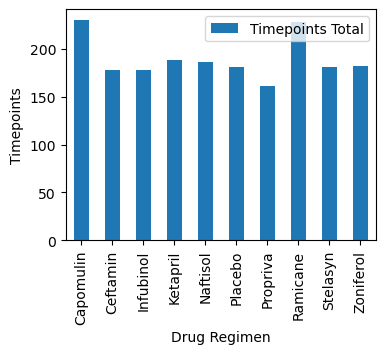

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_bar = timepoints_df.plot(kind="bar",figsize=(4,3),xlabel="Drug Regimen",
                                ylabel="Timepoints")


In [31]:
#Creating regimens list for easier plotting
regimens = merge_df["Drug Regimen"].unique()
print(regimens)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


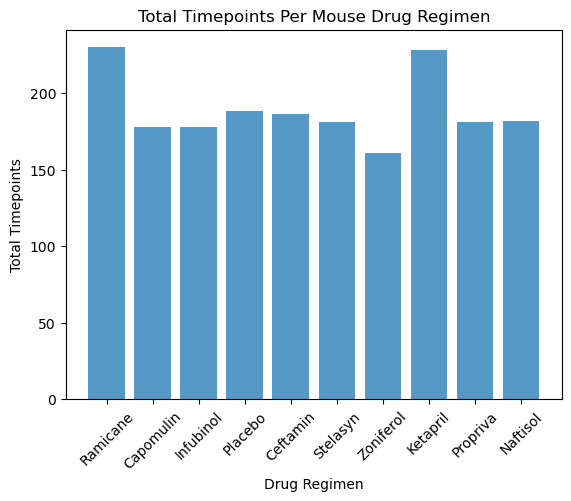

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.title("Total Timepoints Per Mouse Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.bar(regimens, timepoints, alpha=0.75, align="center")
plt.xticks((regimens), rotation = 45)
plt.show()


In [33]:
# Getting grouped-by-sex info for following pie chart and pyplot. 
# Using the no_dupes dataframe as each mouse has multiple entries in merge_df.
sx_count = no_dupes["Sex"].value_counts()
sx_count_df = pd.DataFrame(sx_count)


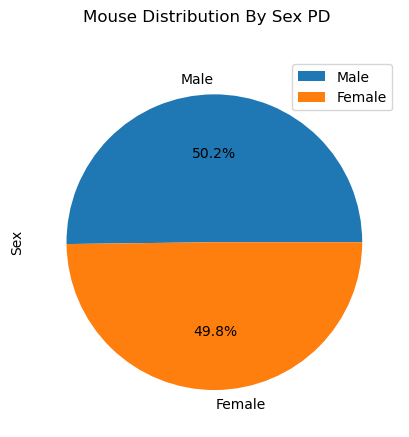

In [34]:
# Pandas Pie Plot: generate a pie plot showing the distribution of female versus male mice using Pandas
msx_pie = sx_count_df.plot(kind="pie", autopct='%1.1f%%', ylabel = "Sex", subplots=True, title="Mouse Distribution By Sex PD")


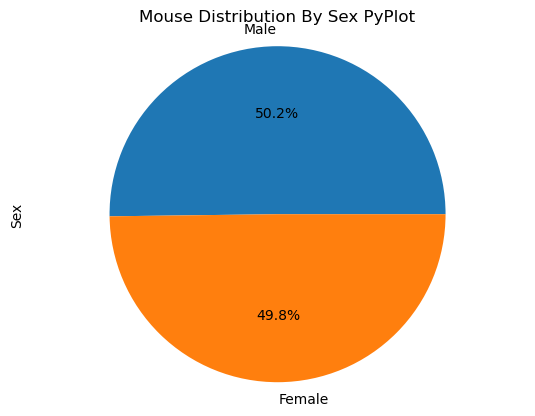

In [35]:
# Py Pie Plot: generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mouse Distribution By Sex PyPlot")
plt.pie(sx_count, labels=sx_count.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


### Quartiles, Outliers, and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
# Start by getting the last (greatest) timepoint for each mouse
grouped_mouse_df = merge_df.groupby(["Mouse ID"])["Timepoint"].max()
# Reset index
grouped_mouse_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
grouped_merge = pd.merge(grouped_mouse_df,merge_df,on=["Mouse ID","Timepoint"])

# Filter for the four regimens"Capomulin", "Ramicane", "Infubinol", "Ceftamin"
grouped_merge_regimens = grouped_merge.loc[(grouped_merge["Drug Regimen"]=="Capomulin")|(grouped_merge["Drug Regimen"]=="Ceftamin")|(grouped_merge["Drug Regimen"]=="Ramicane")|(grouped_merge["Drug Regimen"]=="Infubinol")]

grouped_merge_regimens.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [37]:
# Create an empty list to fill with tumor vol data (for plotting)
tum_vol = []

# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Locate the rows which contain mice on each drug and get the tumor volumes
for x in drugs:
    reg_vol = grouped_merge_regimens.loc[grouped_merge_regimens["Drug Regimen"]==x,"Tumor Volume (mm3)"]
    tum_vol.append(reg_vol) 
        


In [38]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quartiles = grouped_merge_regimens["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr1_5 = iqr * 1.5
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - iqr1_5
upper_bound = upperq + iqr1_5
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
The the median tumor volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


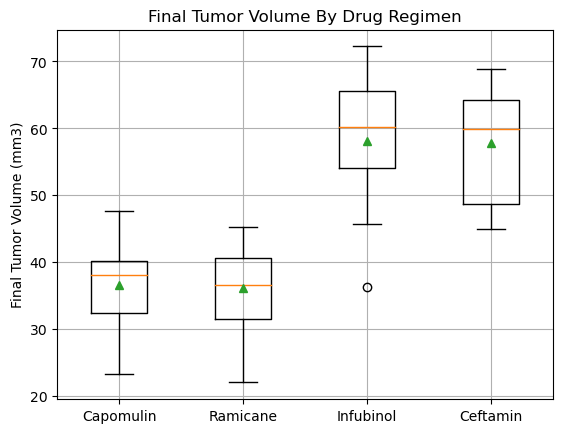

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
plt.grid()
labels=drugs
ax.set_title('Final Tumor Volume By Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot(tum_vol, showmeans=True,labels=labels) 

plt.show()


### Line and Scatter Plots

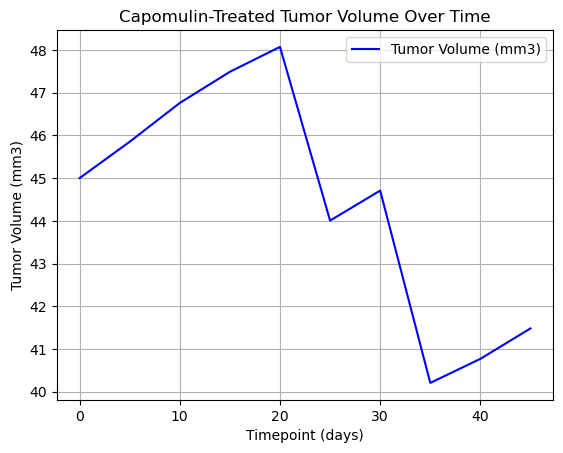

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse1509 = merge_df.loc[(merge_df["Mouse ID"]=="l509") & (merge_df["Drug Regimen"]=="Capomulin")]

# Plot one mouse
cap_mouse1509.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", c="blue", grid=True, xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)',title="Capomulin-Treated Tumor Volume Over Time")

plt.show()


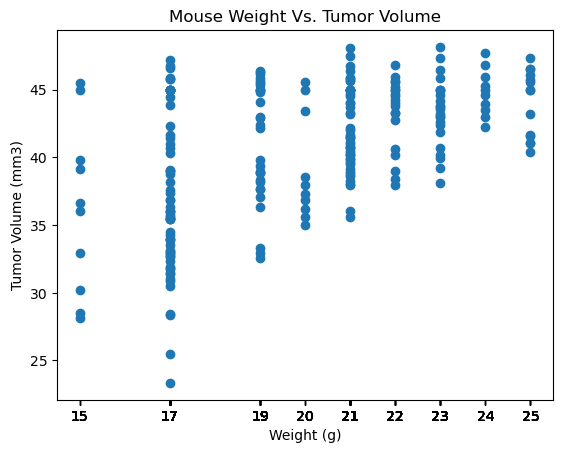

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = merge_df.loc[(merge_df["Drug Regimen"]=="Capomulin"),"Weight (g)"]
avg_tum_vol = merge_df.loc[(merge_df["Drug Regimen"]=="Capomulin"),"Tumor Volume (mm3)"]
plt.scatter(mouse_weight,avg_tum_vol)
plt.xticks(mouse_weight)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Tumor Volume")
plt.show()

### Correlation and Regression

In [42]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight,avg_tum_vol)[0],2)}")



The correlation coefficient between mouse weight and average tumor volume is 0.53


In [43]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
tv_slope, tv_int, tv_r, tv_p, tv_std_err = st.linregress(mouse_weight, avg_tum_vol)
tv_fit = tv_slope * mouse_weight + tv_int

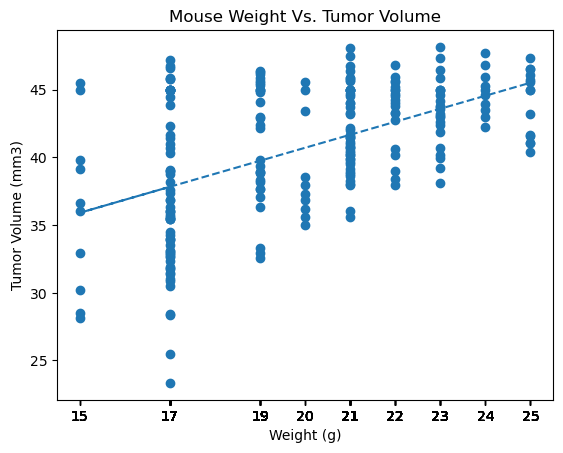

In [44]:
# Plot linear regression model over Mosue Weight Vs. Tumor Volume.
plt.scatter(mouse_weight,avg_tum_vol)
plt.plot(mouse_weight,tv_fit,"--")
plt.xticks(mouse_weight)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Tumor Volume")
plt.show()